### Create gpkg from shp 

In [4]:
import geopandas as gpd
import pandas as pd

In [5]:
data_shp = gpd.read_file("/home/gfa/GSDMA2019/playground/pilote/pilote/Pilote_v7.0.shp")

In [6]:
data_shp.to_file("data.gpkg", driver="GPKG")

In [7]:
data_from_gpkg = gpd.read_file("/home/gfa/GSDMA2019/playground/pilote/data.gpkg")

data_from_gpkg is a geodataframe 

In [9]:
type(data_from_gpkg)

geopandas.geodataframe.GeoDataFrame

In [6]:
? gpd.geodataframe

## Write to geojson

In [11]:
data_from_gpkg.to_file("data.geojson", driver='GeoJSON')

### Inspecting data

In [55]:
(data_from_gpkg)

,Id,Type,Pilote,Ref,diam,Valid,Syscal,Impo,Inox,geometry,new_column,Boreholes,Intervals,Component
0,0,1,1,111,2,1,1.0,0.0,1.0,POINT (152894.553 122591.406),Senaatintori,1,None,None
1,0,1,1,120,2,1,1.0,0.0,1.0,POINT (152881.336 122588.077),None,1,None,None
2,0,2,1,217,3,1,1.0,1.0,1.0,POINT (152885.774 122586.936),None,1,None,None
3,0,1,1,116,2,1,1.0,0.0,1.0,POINT (152883.804 122589.782),None,1,None,None
4,0,2,1,214,2,1,1.0,1.0,1.0,POINT (152888.242 122588.641),None,1,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0,5,0,31,0,0,0.0,NaN,NaN,POINT (152886.080 122578.566),None,1,None,None
81,0,6,0,40,0,0,0.0,NaN,NaN,POINT (152883.640 122577.576),None,1,None,None
82,0,6,0,41,0,0,0.0,NaN,NaN,POINT (152884.220 122576.706),None,1,None,None
83,0,0,0,12,0,1,NaN,NaN,NaN,POINT (152888.640 122578.796),None,1,None,None


### Add column to make the joint between pilote data and detailed data

In [60]:
data_from_gpkg['id'] = 'F'+data_from_gpkg['Ref']

In [61]:
data_from_gpkg

,Id,Type,Pilote,Ref,diam,Valid,Syscal,Impo,Inox,geometry,new_column,Boreholes,Intervals,Component,id
0,0,1,1,111,2,1,1.0,0.0,1.0,POINT (152894.553 122591.406),Senaatintori,1,None,None,F111
1,0,1,1,120,2,1,1.0,0.0,1.0,POINT (152881.336 122588.077),None,1,None,None,F120
2,0,2,1,217,3,1,1.0,1.0,1.0,POINT (152885.774 122586.936),None,1,None,None,F217
3,0,1,1,116,2,1,1.0,0.0,1.0,POINT (152883.804 122589.782),None,1,None,None,F116
4,0,2,1,214,2,1,1.0,1.0,1.0,POINT (152888.242 122588.641),None,1,None,None,F214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0,5,0,31,0,0,0.0,NaN,NaN,POINT (152886.080 122578.566),None,1,None,None,F31
81,0,6,0,40,0,0,0.0,NaN,NaN,POINT (152883.640 122577.576),None,1,None,None,F40
82,0,6,0,41,0,0,0.0,NaN,NaN,POINT (152884.220 122576.706),None,1,None,None,F41
83,0,0,0,12,0,1,NaN,NaN,NaN,POINT (152888.640 122578.796),None,1,None,None,F12


## Work on data

### Access

In [14]:
data_from_gpkg['diam']

0     2
1     2
2     3
3     2
4     2
     ..
80    0
81    0
82    0
83    0
84    0
Name: diam, Length: 85, dtype: int64

### Add a Colomn

In [15]:
data_from_gpkg['new_column'] = None

In [16]:
data_from_gpkg.loc[0, 'new_column'] = 'Senaatintori'

In [17]:
type(data_from_gpkg)

geopandas.geodataframe.GeoDataFrame

## Plot

### Naive

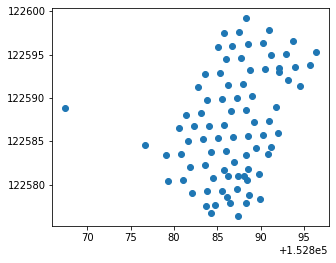

In [18]:
data_from_gpkg.plot()

## CRS

EPSG 31370 (Lambert 72)

In [19]:
data_from_gpkg_84 = data_from_gpkg.to_crs(epsg=4326)

/home/gfa/.local/share/virtualenvs/GSDMA2019-F9ES6BKJ/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [20]:
data_from_gpkg_84

,Id,Type,Pilote,Ref,diam,Valid,Syscal,Impo,Inox,geometry,new_column
0,0,1,1,111,2,1,1.0,0.0,1.0,POINT (4.40947 50.41420),Senaatintori
1,0,1,1,120,2,1,1.0,0.0,1.0,POINT (4.40929 50.41417),None
2,0,2,1,217,3,1,1.0,1.0,1.0,POINT (4.40935 50.41416),None
3,0,1,1,116,2,1,1.0,0.0,1.0,POINT (4.40932 50.41419),None
4,0,2,1,214,2,1,1.0,1.0,1.0,POINT (4.40938 50.41418),None
...,...,...,...,...,...,...,...,...,...,...,...
80,0,5,0,31,0,0,0.0,NaN,NaN,POINT (4.40935 50.41409),None
81,0,6,0,40,0,0,0.0,NaN,NaN,POINT (4.40932 50.41408),None
82,0,6,0,41,0,0,0.0,NaN,NaN,POINT (4.40933 50.41407),None
83,0,0,0,12,0,1,NaN,NaN,NaN,POINT (4.40939 50.41409),None


In [21]:
data_from_gpkg_84.to_file("data_84.geojson", driver='GeoJSON')

In [22]:
import contextily as ctx

### Add background tiles to plot

In [23]:
def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

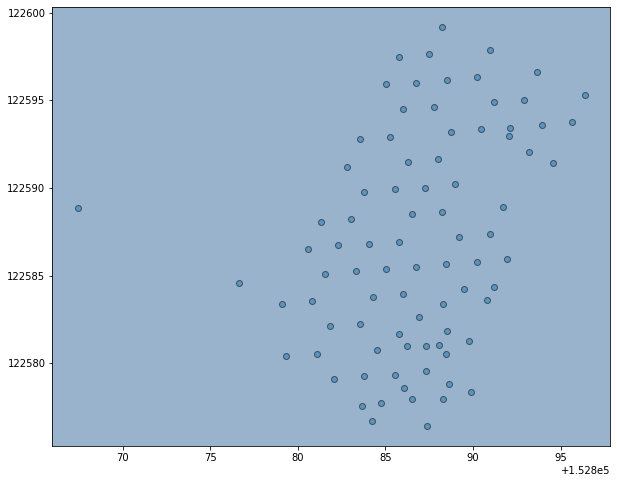

In [24]:
ax = data_from_gpkg.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
add_basemap(ax,zoom=1)

In [25]:
? ctx.tile

## Folium 

In [26]:
import folium

In [27]:
ls

1st_cylinder_pv.ipynb        pandas/
6038187_v1.2.las             pilote/
data_84.geojson              pilote.zip
data.geojson                 read_data/
data.gpkg                    shp_to_gpkg.ipynb
Data_treatment/              SQL_test_good.ipynb
E_F10.db                     SQL_test_good-last.ipynb
Example-Copy1.ipynb          striplog_basic_objects.ipynb
final.db                     striplog_basics.ipynb
index.html                   Striplog_manipulation.ipynb
LAS_file_from_scratch.ipynb  Striplog_read_database/
manipulate_gdf.ipynb         testA.md
M-MG-70_14.3_135.9.png       test_image.png
omf/                         test.md


In [28]:
'data.geojson'

'data.geojson'

#### data gdf en WGS84

In [29]:
data_json = 'data.geojson'
data_84 = 'data_84.geojson'

In [28]:
type(data_from_gpkg)

geopandas.geodataframe.GeoDataFrame

In [30]:
ice_map = folium.Map(location=[50.455, 3.94],
                    zoom_start=10)
folium.GeoJson(
    data_84).add_to(ice_map)
ice_map


save in a file

In [31]:
m.save('index.html')

In [32]:
folium.GeoJson(
    'data.geojson',
    name='geojson'
).add_to(m)

folium.LayerControl().add_to(m)


m


In [33]:
? folium.GeoJson

## Access SQlite

In [34]:
import sqlite3

In [35]:
conn = sqlite3.connect('final.db')

In [36]:
conn

In [37]:
cursor = conn.cursor()

In [38]:
for table in cursor.execute("SELECT name FROM sqlite_master WHERE type='table';"):
    print(table)

('Boreholes',)
('Intervals',)
('Component',)
('lexicon',)


In [39]:
data_from_gpkg['Boreholes'] = None
data_from_gpkg['Intervals'] = None
data_from_gpkg['Component'] = None

In [40]:
for table in cursor.execute("SELECT name FROM sqlite_master WHERE type='table';"):
    print(type(table))

<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>


In [41]:
data_from_gpkg[('Boreholes')]  = 1

In [42]:
data_from_gpkg[('Boreholes')]

0     1
1     1
2     1
3     1
4     1
     ..
80    1
81    1
82    1
83    1
84    1
Name: Boreholes, Length: 85, dtype: int64

### SQLite and df

In [43]:
conn = sqlite3.connect('final.db')

In [44]:
conn

In [45]:
cursor = conn.cursor()

In [46]:
cursor.execute("select * from Boreholes limit 5;")

# https://www.dataquest.io/blog/python-pandas-databases/

In [47]:
for row in cursor.execute("SELECT id, name, marks from SCHOOL"):
print("ID = ", row[0])
    print("NAME = ", row[1])
    print("MARKS = ", row[2], "\n")

IndentationError: expected an indented block (<ipython-input-47-8d79dd2078e7>, line 2)

### Reading results into an Panda Dataframe

In [52]:
df = pd.read_sql_query("SELECT * from Component", conn)

## Access data in SQL

In [49]:
for row in cursor.execute("SELECT Top, Base from Component"):
    print(row)
  data_from_gpkg[('Boreholes')]  = 1

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 3)

Chaque row est un tuple

In [64]:
data_from_gpkg

,Id,Type,Pilote,Ref,diam,Valid,Syscal,Impo,Inox,geometry,new_column,Boreholes,Intervals,Component
0,0,1,1,111,2,1,1.0,0.0,1.0,POINT (152894.553 122591.406),Senaatintori,1,None,None
1,0,1,1,120,2,1,1.0,0.0,1.0,POINT (152881.336 122588.077),None,1,None,0
2,0,2,1,217,3,1,1.0,1.0,1.0,POINT (152885.774 122586.936),None,1,None,None
3,0,1,1,116,2,1,1.0,0.0,1.0,POINT (152883.804 122589.782),None,1,None,None
4,0,2,1,214,2,1,1.0,1.0,1.0,POINT (152888.242 122588.641),None,1,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0,5,0,31,0,0,0.0,NaN,NaN,POINT (152886.080 122578.566),None,1,None,None
81,0,6,0,40,0,0,0.0,NaN,NaN,POINT (152883.640 122577.576),None,1,None,None
82,0,6,0,41,0,0,0.0,NaN,NaN,POINT (152884.220 122576.706),None,1,None,None
83,0,0,0,12,0,1,NaN,NaN,NaN,POINT (152888.640 122578.796),None,1,None,None


In [66]:
for i in data_from_gpkg[('Id')]:
    print (i)
    
data_from_gpkg[('Component')][1] =0
data_from_gpkg

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


/home/gfa/.local/share/virtualenvs/GSDMA2019-F9ES6BKJ/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Id,Type,Pilote,Ref,diam,Valid,Syscal,Impo,Inox,geometry,new_column,Boreholes,Intervals,Component
0,0,1,1,111,2,1,1.0,0.0,1.0,POINT (152894.553 122591.406),Senaatintori,1,None,None
1,0,1,1,120,2,1,1.0,0.0,1.0,POINT (152881.336 122588.077),None,1,None,0
2,0,2,1,217,3,1,1.0,1.0,1.0,POINT (152885.774 122586.936),None,1,None,None
3,0,1,1,116,2,1,1.0,0.0,1.0,POINT (152883.804 122589.782),None,1,None,None
4,0,2,1,214,2,1,1.0,1.0,1.0,POINT (152888.242 122588.641),None,1,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0,5,0,31,0,0,0.0,NaN,NaN,POINT (152886.080 122578.566),None,1,None,None
81,0,6,0,40,0,0,0.0,NaN,NaN,POINT (152883.640 122577.576),None,1,None,None
82,0,6,0,41,0,0,0.0,NaN,NaN,POINT (152884.220 122576.706),None,1,None,None
83,0,0,0,12,0,1,NaN,NaN,NaN,POINT (152888.640 122578.796),None,1,None,None


In [51]:
data_from_gpkg[('Component')]

0     None
1        0
2     None
3     None
4     None
      ... 
80    None
81    None
82    None
83    None
84    None
Name: Component, Length: 85, dtype: object

In [52]:
for row in cursor.execute("SELECT * from Component"):
    for i in data_from_gpkg[('Component')]:
        data_from_gpkg[('Component')][i] = 
    #print (row)
    #data_from_gpkg[('Component')]  = row

SyntaxError: invalid syntax (<ipython-input-52-44078994efd8>, line 3)

In [53]:
for row in cursor.execute("SELECT * from Component"):
    print(row)

('F25', 0.0, 1.5, 'lithology', 'remblais')
('F25', 0.0, 1.5, 'color', 'brun')
('F25', 1.5, 4.0, 'lithology', 'remblais')
('F25', 1.5, 4.0, 'color', 'ocre')
('F25', 4.0, 6.0, 'lithology', 'silt')
('F25', 4.0, 6.0, 'color', 'gris')
('F25', 0.0, 1.5, 'lithology', 'remblais')
('F25', 0.0, 1.5, 'color', 'brun')
('F25', 1.5, 4.0, 'lithology', 'remblais')
('F25', 1.5, 4.0, 'color', 'ocre')
('F25', 4.0, 6.0, 'lithology', 'silt')
('F25', 4.0, 6.0, 'color', 'gris')
('F25', 0.0, 1.5, 'lithology', 'remblais')
('F25', 0.0, 1.5, 'color', 'brun')
('F25', 1.5, 4.0, 'lithology', 'remblais')
('F25', 1.5, 4.0, 'color', 'ocre')
('F25', 4.0, 6.0, 'lithology', 'silt')
('F25', 4.0, 6.0, 'color', 'gris')
('F25', 0.0, 1.5, 'lithology', 'remblais')
('F25', 0.0, 1.5, 'color', 'brun')
('F25', 1.5, 4.0, 'lithology', 'remblais')
('F25', 1.5, 4.0, 'color', 'ocre')
('F25', 4.0, 6.0, 'lithology', 'silt')
('F25', 4.0, 6.0, 'color', 'gris')
('F25', 0.0, 1.5, 'lithology', 'remblais')
('F25', 0.0, 1.5, 'color', 'brun')
('

In [69]:
for row in cursor.execute("SELECT * from Component"):
    print(type(row))

<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class '

## writing  

type geopandas.geodataframe.GeoDataFrame

data_shp

In [55]:
data_shp['Pilote']

0     1
1     1
2     1
3     1
4     1
     ..
80    0
81    0
82    0
83    0
84    0
Name: Pilote, Length: 85, dtype: int64

In [71]:
type(data_from_gpkg_84)

geopandas.geodataframe.GeoDataFrame

In [56]:
print(data_from_gpkg[('Component')])
c=0
for row in cursor.execute("SELECT * from Component"):
    c=c+1
    print(row)
    print(c)

0     None
1        0
2     None
3     None
4     None
      ... 
80    None
81    None
82    None
83    None
84    None
Name: Component, Length: 85, dtype: object
('F25', 0.0, 1.5, 'lithology', 'remblais')
1
('F25', 0.0, 1.5, 'color', 'brun')
2
('F25', 1.5, 4.0, 'lithology', 'remblais')
3
('F25', 1.5, 4.0, 'color', 'ocre')
4
('F25', 4.0, 6.0, 'lithology', 'silt')
5
('F25', 4.0, 6.0, 'color', 'gris')
6
('F25', 0.0, 1.5, 'lithology', 'remblais')
7
('F25', 0.0, 1.5, 'color', 'brun')
8
('F25', 1.5, 4.0, 'lithology', 'remblais')
9
('F25', 1.5, 4.0, 'color', 'ocre')
10
('F25', 4.0, 6.0, 'lithology', 'silt')
11
('F25', 4.0, 6.0, 'color', 'gris')
12
('F25', 0.0, 1.5, 'lithology', 'remblais')
13
('F25', 0.0, 1.5, 'color', 'brun')
14
('F25', 1.5, 4.0, 'lithology', 'remblais')
15
('F25', 1.5, 4.0, 'color', 'ocre')
16
('F25', 4.0, 6.0, 'lithology', 'silt')
17
('F25', 4.0, 6.0, 'color', 'gris')
18
('F25', 0.0, 1.5, 'lithology', 'remblais')
19
('F25', 0.0, 1.5, 'color', 'brun')
20
('F25', 1.5, 4.0,

In [57]:
cc=0
for row in cursor.execute("SELECT * from Boreholes"):
    cc=cc+1
    print(row)
    print(cc)

('F10',)
1
('F11',)
2
('F12',)
3
('F13',)
4
('F14',)
5
('F15',)
6
('F16',)
7
('F20',)
8
('F21',)
9
('F22',)
10
('F23',)
11
('F24',)
12
('F25',)
13


In [58]:
ccc=0
for row in cursor.execute("SELECT * from Intervals"):
    ccc=ccc+1
    print(row)
    print(ccc)

('F10', 0.0, 1.5, 'remblais non-saturés')
1
('F10', 1.5, 4.0, 'remblais saturés')
2
('F10', 4.0, 6.0, 'alluvions')
3
('F11', 0.0, 1.5, 'remblais non-saturés')
4
('F11', 1.5, 4.0, 'remblais saturés')
5
('F11', 4.0, 6.0, 'alluvions')
6
('F12', 0.0, 1.5, 'remblais non-saturés')
7
('F12', 1.5, 4.0, 'remblais saturés')
8
('F12', 4.0, 6.0, 'alluvions')
9
('F13', 0.0, 1.5, 'remblais non-saturés')
10
('F13', 1.5, 4.0, 'remblais saturés')
11
('F13', 4.0, 6.0, 'alluvions')
12
('F14', 0.0, 1.5, 'remblais non-saturés')
13
('F14', 1.5, 4.0, 'remblais saturés')
14
('F14', 4.0, 6.0, 'alluvions')
15
('F15', 0.0, 1.5, 'remblais non-saturés')
16
('F15', 1.5, 4.0, 'remblais saturés')
17
('F15', 4.0, 6.0, 'alluvions')
18
('F16', 0.0, 1.5, 'remblais non-saturés')
19
('F16', 1.5, 4.0, 'remblais saturés')
20
('F16', 4.0, 6.0, 'alluvions')
21
('F20', 0.0, 1.5, 'remblais non-saturés')
22
('F20', 1.5, 4.0, 'remblais saturés')
23
('F20', 4.0, 6.0, 'alluvions')
24
('F21', 0.0, 1.5, 'remblais non-saturés')
25
('F2